## Sprint 2
## Team id : PNT2022TMID09252

### Import the necessary packages

In [13]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

### Load data

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [15]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
y_train[60]

4

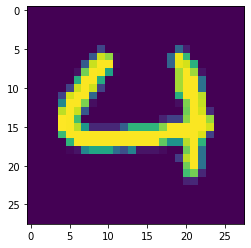

In [18]:
plt.imshow(X_train[60])

### Data Pre-Processing

In [19]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [20]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [21]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [22]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [24]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.1936 - accuracy: 0.9519 - val_loss: 0.0918 - val_accuracy: 0.9688
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0763 - val_accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0794 - val_accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0950 - val_accuracy: 0.9755
Epoch 5/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.1479 - val_accuracy: 0.9731


### Test the model

In [25]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.14789770543575287, 0.9731000065803528]


In [26]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 92ms/step
[[1.46461960e-15 3.94714071e-19 8.12033982e-11 4.90593521e-09
  7.53183062e-23 2.44466838e-15 7.29853000e-26 1.00000000e+00
  3.52477403e-09 5.94345130e-14]
 [6.71883210e-16 1.52045650e-14 1.00000000e+00 2.71267926e-14
  4.16235320e-19 4.88125671e-24 4.34760870e-14 5.08464788e-20
  3.27580728e-17 7.82461936e-20]
 [2.97848279e-09 9.99999404e-01 7.40346806e-08 1.61799361e-12
  2.36974906e-09 2.48901216e-07 1.06604274e-10 1.38819696e-12
  1.89101044e-07 7.27624488e-11]
 [9.99998927e-01 2.46784637e-15 2.15863594e-08 2.25262007e-16
  1.91018859e-12 3.23049400e-11 1.02620459e-06 1.43847163e-12
  1.87699303e-13 2.77329548e-10]]


In [27]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
